In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from typing import Union, List
import joblib
import imblearn
import warnings
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

#warnings.filterwarnings(action='ignore')

## load data

In [3]:
df = pd.read_csv('modified_0420.csv')

In [4]:
#df = p.get_df()
print(df.shape)
df = df.drop(columns=['Unnamed: 0'])
df

(1131682, 91)


,loan_amnt,term,int_rate,installment,sub_grade,emp_length,loan_status,delinq_2yrs,inq_last_6mths,pub_rec,...,tax_liens_log,tot_cur_bal_log,tot_hi_cred_lim_log,total_acc_log,total_bal_ex_mort_log,total_bal_il_log,total_bc_limit_log,total_cu_tl_log,total_il_high_credit_limit_log,total_rev_hi_lim_log
0,6000.0,36,7.97,187.94,4,2,0,1.0,0.0,0.0,...,0.0,10.820878,11.272280,3.610918,10.820878,10.757158,9.615872,0.000000,10.942208,10.003378
1,23200.0,60,24.99,680.82,23,10,1,1.0,1.0,0.0,...,0.0,13.315176,13.386134,4.110874,12.592905,12.533767,9.918425,1.386294,12.582679,10.317450
2,16000.0,36,7.07,494.55,1,10,1,0.0,0.0,0.0,...,0.0,11.522113,12.186584,3.367296,10.390594,10.263641,10.987003,0.000000,10.806490,11.157692
3,4500.0,36,10.42,146.10,7,5,0,0.0,0.0,2.0,...,0.0,12.178635,12.263577,2.302585,9.166806,7.919356,9.137877,0.000000,9.390242,9.532496
4,20000.0,36,9.99,645.25,7,10,0,0.0,0.0,0.0,...,0.0,11.831590,12.137612,3.713572,11.101704,0.000000,9.305741,0.000000,11.199461,10.229224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131677,26500.0,60,17.27,662.45,14,2,0,0.0,0.0,0.0,...,0.0,12.346938,12.461776,2.833213,10.434557,0.000000,9.846970,0.000000,9.728241,10.507831
1131678,3600.0,36,19.99,133.78,20,7,1,0.0,0.0,0.0,...,0.0,11.195760,11.378571,2.302585,9.390493,0.000000,8.779711,0.000000,9.501217,9.278092
1131679,19000.0,36,6.68,583.89,2,4,0,0.0,0.0,0.0,...,0.0,12.388636,12.548072,3.526361,10.837304,0.000000,9.775711,0.000000,10.681688,10.225607
1131680,9600.0,36,14.33,329.65,10,9,0,0.0,1.0,0.0,...,0.0,11.884551,11.926941,2.197225,9.513256,0.000000,8.343078,0.000000,9.251002,8.881975


In [6]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), index = df.index, columns = df.columns)

In [7]:
scaled_df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,loan_status,delinq_2yrs,inq_last_6mths,pub_rec,...,tax_liens_log,tot_cur_bal_log,tot_hi_cred_lim_log,total_acc_log,total_bal_ex_mort_log,total_bal_il_log,total_bc_limit_log,total_cu_tl_log,total_il_high_credit_limit_log,total_rev_hi_lim_log
0,-0.959952,-0.582630,-1.080402,-0.947946,-1.014534,-1.121865,-0.503241,0.786118,-0.679154,-0.350899,...,-0.163879,0.006349,0.034134,0.977497,0.334977,1.132293,0.168643,-0.524523,0.535766,0.130922
1,0.955089,1.716356,2.435964,0.898168,1.985456,1.025149,1.987121,0.786118,0.430688,-0.350899,...,-0.163879,1.030993,0.923539,1.988871,1.274601,1.479700,0.318737,1.677057,0.964845,0.285316
2,0.153444,-0.582630,-1.266343,0.200482,-1.488216,1.025149,1.987121,-0.357816,-0.679154,-0.350899,...,-0.163879,0.294413,0.418828,0.484667,0.106817,1.035788,0.848852,-0.524523,0.500267,0.698369
3,-1.126962,-0.582630,-0.574227,-1.104660,-0.540851,-0.316735,-0.503241,-0.357816,-0.679154,3.029069,...,-0.163879,0.564108,0.451223,-1.669165,-0.542101,0.577374,-0.068487,-0.524523,0.129835,-0.100557
4,0.598802,-0.582630,-0.663066,0.764938,-0.540851,1.025149,-0.503241,-0.357816,-0.679154,-0.350899,...,-0.163879,0.421544,0.398223,1.185158,0.483886,-0.971217,0.014789,-0.524523,0.603052,0.241945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131677,1.322510,1.716356,0.840997,0.829362,0.564408,-1.121865,-0.503241,-0.357816,-0.679154,-0.350899,...,-0.163879,0.633246,0.534615,-0.595743,0.130129,-0.971217,0.283289,-0.524523,0.218241,0.378905
1131678,-1.227167,-0.582630,1.402954,-1.150806,1.511773,0.220019,1.987121,-0.357816,-0.679154,-0.350899,...,-0.163879,0.160349,0.078856,-1.669165,-0.423490,-0.971217,-0.246171,-0.524523,0.158861,-0.225619
1131679,0.487463,-0.582630,-1.346918,0.535111,-1.330322,-0.585112,-0.503241,-0.357816,-0.679154,-0.350899,...,-0.163879,0.650375,0.570924,0.806443,0.343687,-0.971217,0.247938,-0.524523,0.467624,0.240167
1131680,-0.559130,-0.582630,0.233587,-0.417162,-0.067169,0.756772,-0.503241,-0.357816,0.430688,-0.350899,...,-0.163879,0.443300,0.309583,-1.882301,-0.358394,-0.971217,-0.462782,-0.524523,0.093415,-0.420346


## Design Matrix

In [34]:
df_X = scaled_df.drop(columns=['loan_status'])
df_y = df['loan_status']

pca1 = PCA(n_components = 2)
pca1.fit(df_X)
df_Xpca = pca1.transform(df_X)

In [69]:
pca1.explained_variance_ratio_.sum()

0.23887497813706637

In [35]:
df_X = pd.DataFrame(df_Xpca)
df_X

,0,1
0,-0.737010,5.630931
1,-6.327888,2.223269
2,-3.449409,1.235164
3,1.017034,2.313233
4,-1.846255,-4.014087
...,...,...
1131677,0.251947,-3.311811
1131678,2.413552,-2.333402
1131679,-1.110250,-3.477373
1131680,2.122935,-2.729377


In [36]:
df_y = pd.DataFrame(df_y)
df_y

,loan_status
0,0
1,1
2,1
3,0
4,0
...,...
1131677,0
1131678,1
1131679,0
1131680,0


In [46]:
dfs = pd.concat([df_y, df_X], axis=1)

Text(0.5, 1.0, 'PCA(n=2) and their loan status')

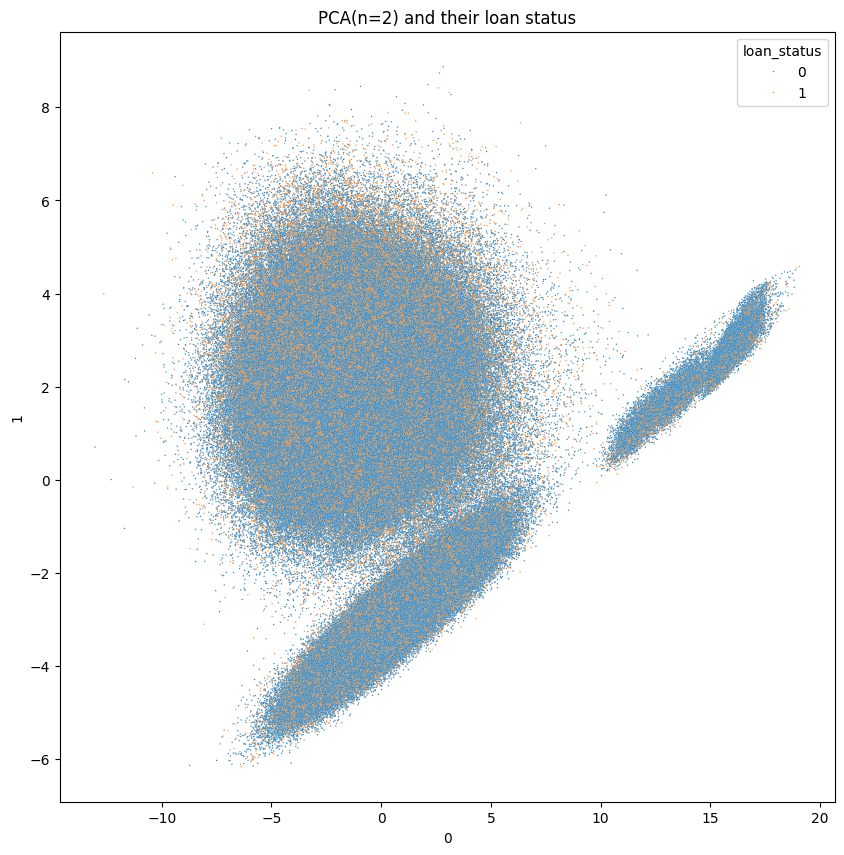

In [61]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = 0, y = 1, hue='loan_status', s = 1, data = dfs)
plt.title('PCA(n=2) and their loan status')

In [3]:
df = pd.read_csv('/Users/admin/Documents/GitHub/Bigdata_Fintech_Python/Lending_Club_Project/lending_club_2020_train.csv')
print(df.shape)

/var/folders/6h/grchm_d95kq59vq4y3tnsm7c0000gn/T/ipykernel_18013/952547012.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/admin/Documents/GitHub/Bigdata_Fintech_Python/Lending_Club_Project/lending_club_2020_train.csv')


(1755295, 141)


In [4]:
df_y = df['loan_status']
df_y

0           Fully Paid
1              Current
2          Charged Off
3              Current
4              Current
              ...     
1755290    Charged Off
1755291     Fully Paid
1755292     Fully Paid
1755293     Fully Paid
1755294        Current
Name: loan_status, Length: 1755295, dtype: object

In [5]:
intr = df['int_rate']
intr 

0            7.97%
1           14.47%
2           24.99%
3            9.93%
4           16.40%
            ...   
1755290     19.99%
1755291      6.68%
1755292     14.33%
1755293      7.35%
1755294     13.49%
Name: int_rate, Length: 1755295, dtype: object

In [10]:
tl = df['loan_amnt']
tl

0           6000.0
1          35000.0
2          23200.0
3           4500.0
4          15000.0
            ...   
1755290     3600.0
1755291    19000.0
1755292     9600.0
1755293    24000.0
1755294    14400.0
Name: loan_amnt, Length: 1755295, dtype: float64

In [9]:
tr = df['total_rec_prncp']
tr

0           6000.00
1           9006.68
2           1030.43
3           3517.59
4           4089.07
             ...   
1755290      148.85
1755291    19000.00
1755292     9600.00
1755293    24000.00
1755294     7975.28
Name: total_rec_prncp, Length: 1755295, dtype: float64

In [12]:
rec = df['recoveries']
rec

0             0.00
1             0.00
2          5260.00
3             0.00
4             0.00
            ...   
1755290     201.51
1755291       0.00
1755292       0.00
1755293       0.00
1755294       0.00
Name: recoveries, Length: 1755295, dtype: float64

In [81]:
dfl = dfk.drop(columns='loan_status')

In [ ]:
scaler = StandardScaler()
scaler.fit(dfk)
scaled_dfk = pd.DataFrame(scaler.transform(dfk), index = dfk.index, columns = dfk.columns)
scaled_dfk

KeyboardInterrupt: 

In [ ]:
df_X = scaled_df.drop(columns=['loan_status'])
df_y = df['loan_status']

pca1 = PCA(n_components = 2)
pca1.fit(df_X)
df_Xpca = pca1.transform(df_X)

In [ ]:
pca1.explained_variance_ratio_.sum()

0.23887497813706637

In [ ]:
df_X = pd.DataFrame(df_Xpca)
df_X

,0,1
0,-0.737010,5.630931
1,-6.327888,2.223269
2,-3.449409,1.235164
3,1.017034,2.313233
4,-1.846255,-4.014087
...,...,...
1131677,0.251947,-3.311811
1131678,2.413552,-2.333402
1131679,-1.110250,-3.477373
1131680,2.122935,-2.729377


In [ ]:
df_y = pd.DataFrame(df_y)
df_y

,loan_status
0,0
1,1
2,1
3,0
4,0
...,...
1131677,0
1131678,1
1131679,0
1131680,0


In [ ]:
dfs = pd.concat([df_y, df_X], axis=1)

Text(0.5, 1.0, 'PCA(n=2) and their loan status')

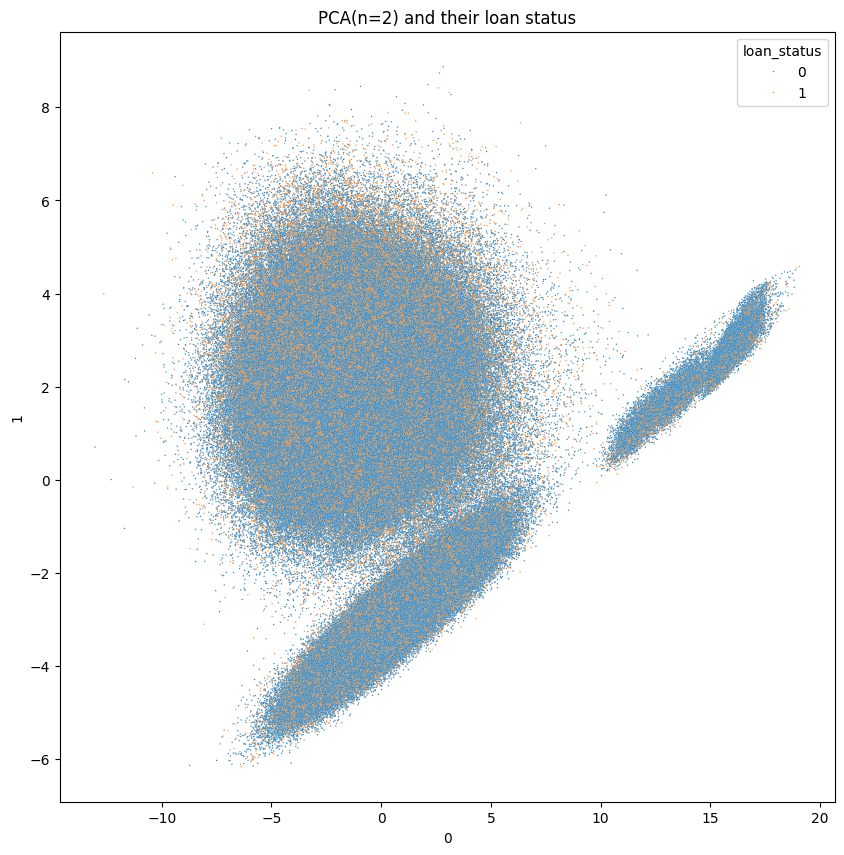

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x = 0, y = 1, hue='loan_status', s = 1, data = dfs)
plt.title('PCA(n=2) and their loan status')